# Sparse Hebbian Learning: basics of coding

We are interested here in learning the "optimal" components of a set of images (let's say some "natural", usual images). As there is no supervisor to guide the learning, this is called unsupervised learning. Our basic hypothesis to find the best ("optimal") components will be to assume that *a priori* the most sparse is more plausible. We will implement the derived algorithm in this set of scripts.

Here, we will show the basic operations that are implemented in this package. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)

## experiments

To test and control for the role of different parameters, we will have a first object (in the [shl_experiments.py](https://github.com/bicv/SparseHebbianLearning/blob/master/shl_scripts/shl_experiments.py) script) that controls a learning experiment. It contains all relevant parameters, but can also keep a trace of the history of some statistics. This is useful to compare the relative efficiency of the different solutions.


In [3]:
tag = 'coding'
homeo_methods = ['None', 'HEH']
homeo_methods = ['None', 'HAP']
homeo_methods = ['None', 'HAP', 'HEH']

record_num_batches = 2**10

seed = 42
np.random.seed(seed)

In [4]:
from shl_scripts.shl_experiments import SHL
shl = SHL()
data = shl.get_data(matname=tag + '_test')
indx = np.random.permutation(data.shape[0])[:record_num_batches]

In [5]:
!ls -l {shl.cache_dir}/{tag}*

-rw-r--r--  1 lolo  staff  169827968 Sep 26 14:58 cache_dir/coding_test_data.npy


In [6]:
print('number of patches, size of patches = ', data.shape)
print('average of patches = ', data.mean(), ' +/- ', data.mean(axis=1).std())
SE = np.sqrt(np.mean(data**2, axis=1))
print('average energy of data = ', SE.mean(), '+/-', SE.std())

number of patches, size of patches =  (65520, 324)
average of patches =  7.751930312581928e-19  +/-  0.009577051865437938
average energy of data =  0.2985162259034731 +/- 0.08935954499531111


## learning

The actual learning is done in a second object (here ``dico``) from which we can access another set of properties and functions  (see the [shl_learn.py](https://github.com/bicv/SparseHebbianLearning/blob/master/shl_scripts/shl_learn.py) script):

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶None🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  -2.361202331745125e-05 +/- 0.0012570164727078506
average energy of filters =  1.0 +/- 3.5856661466053436e-17


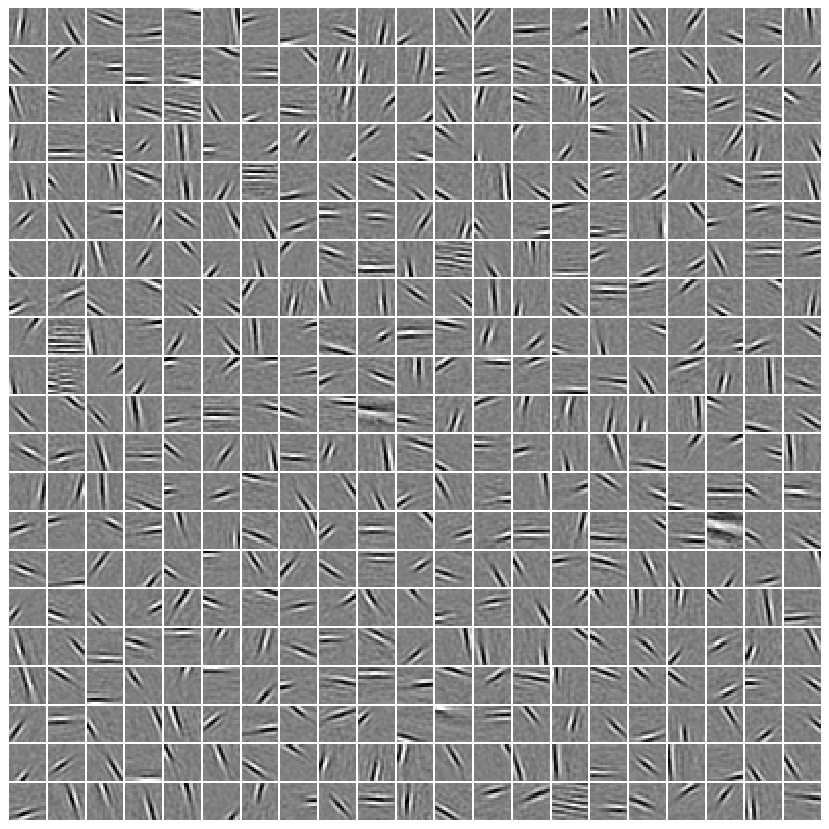

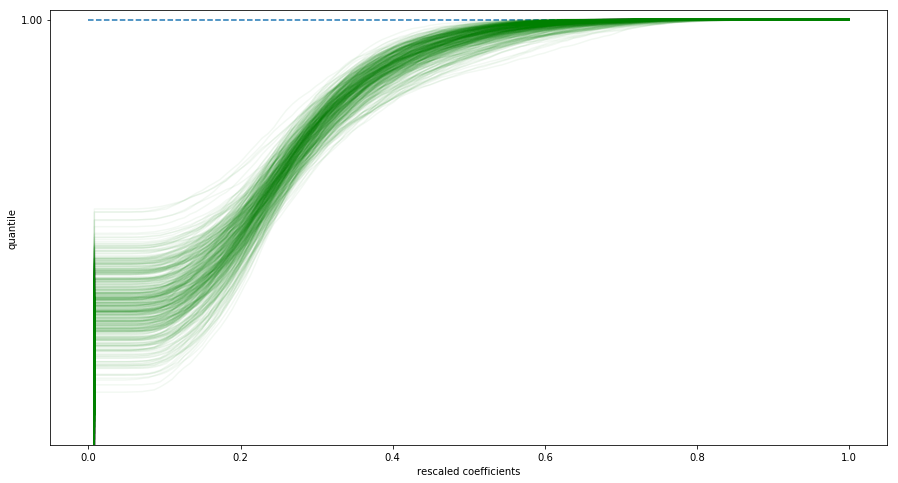

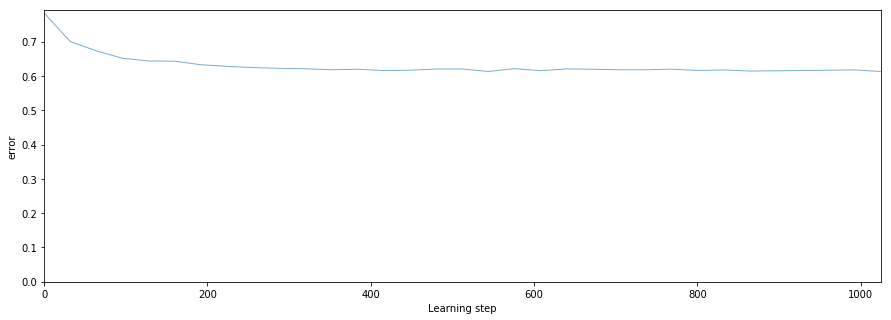

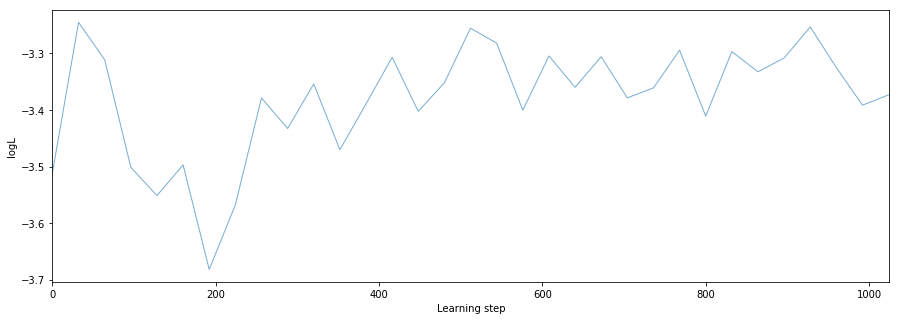

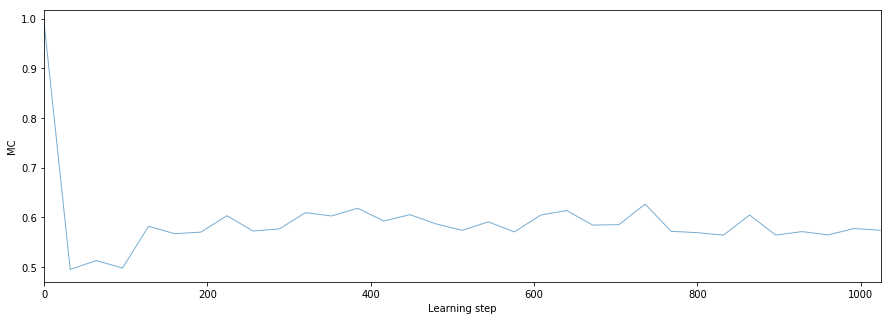

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  1.5907006799275707e-05 +/- 0.001278096509344439
average energy of filters =  1.0 +/- 3.506850672662045e-17


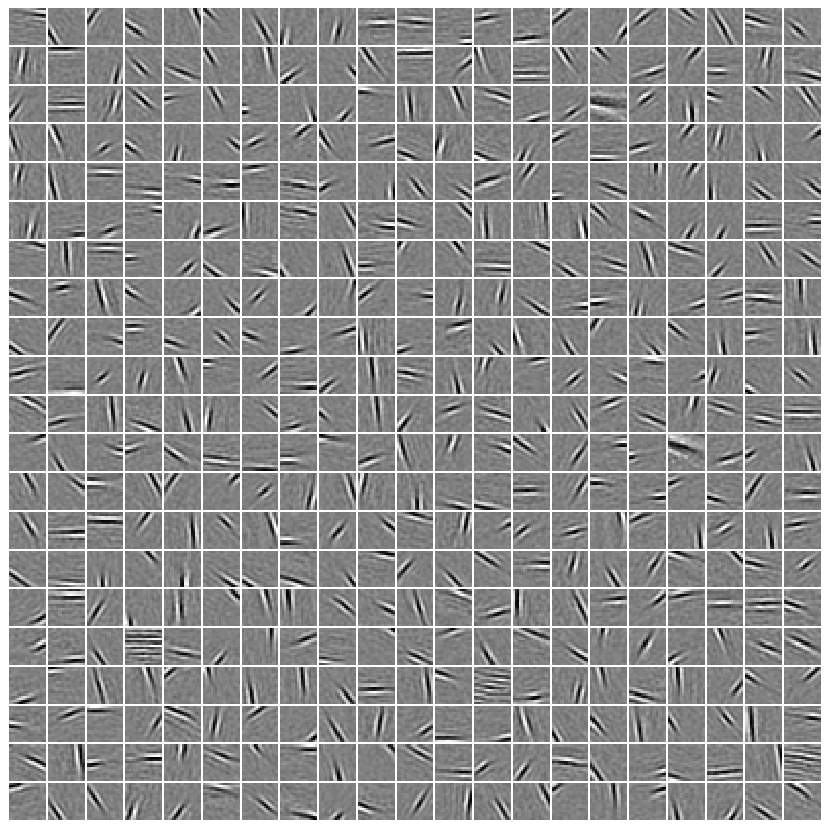

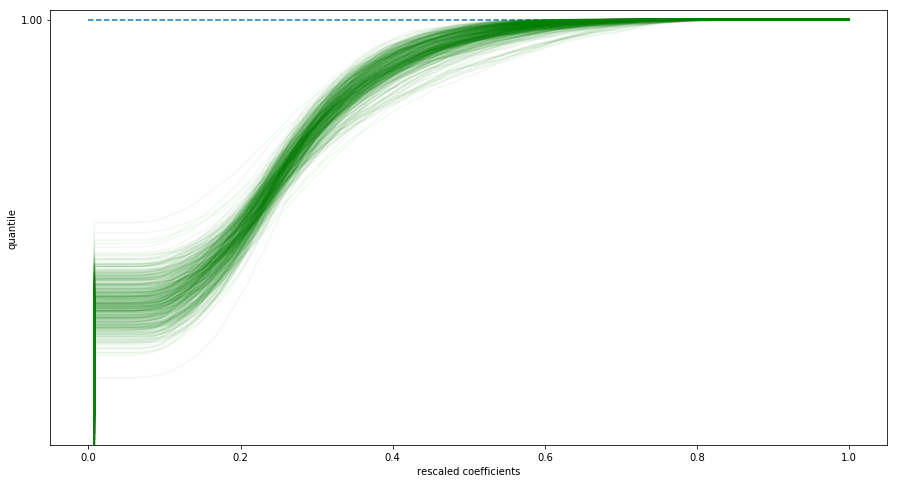

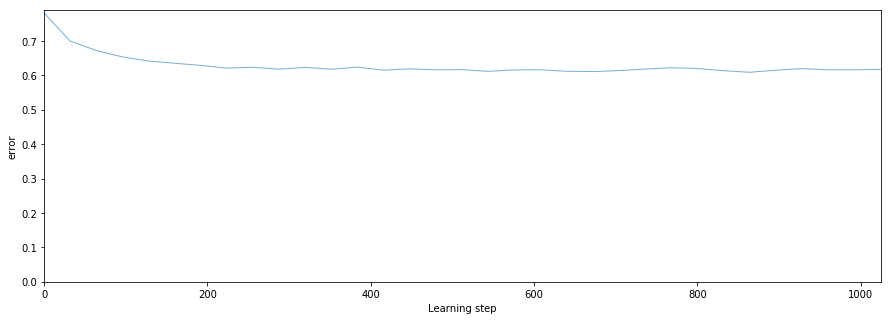

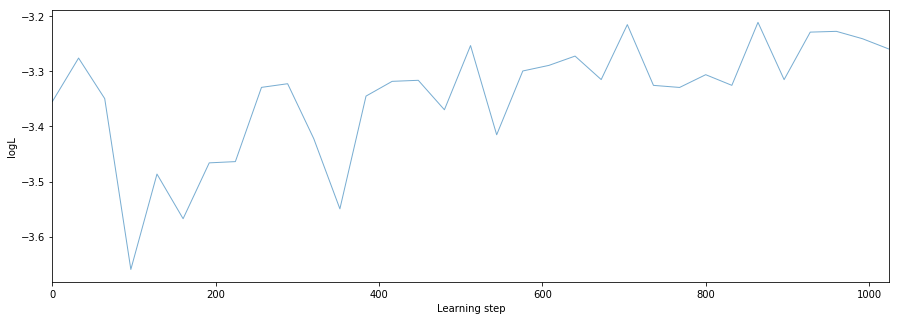

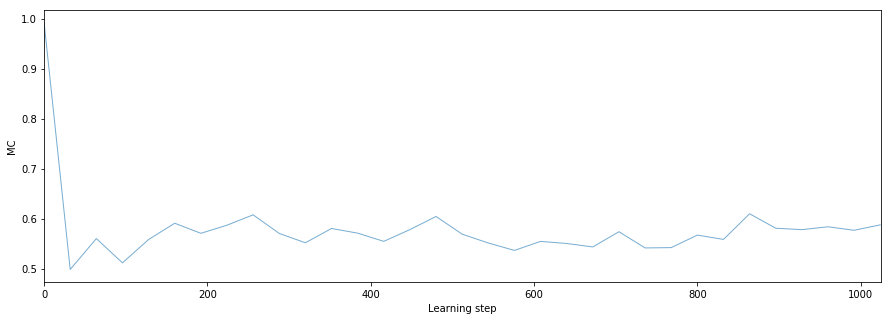

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HEH🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  3.157706803377186e-05 +/- 0.0012374676646552387
average energy of filters =  1.0 +/- 3.920778245506598e-17


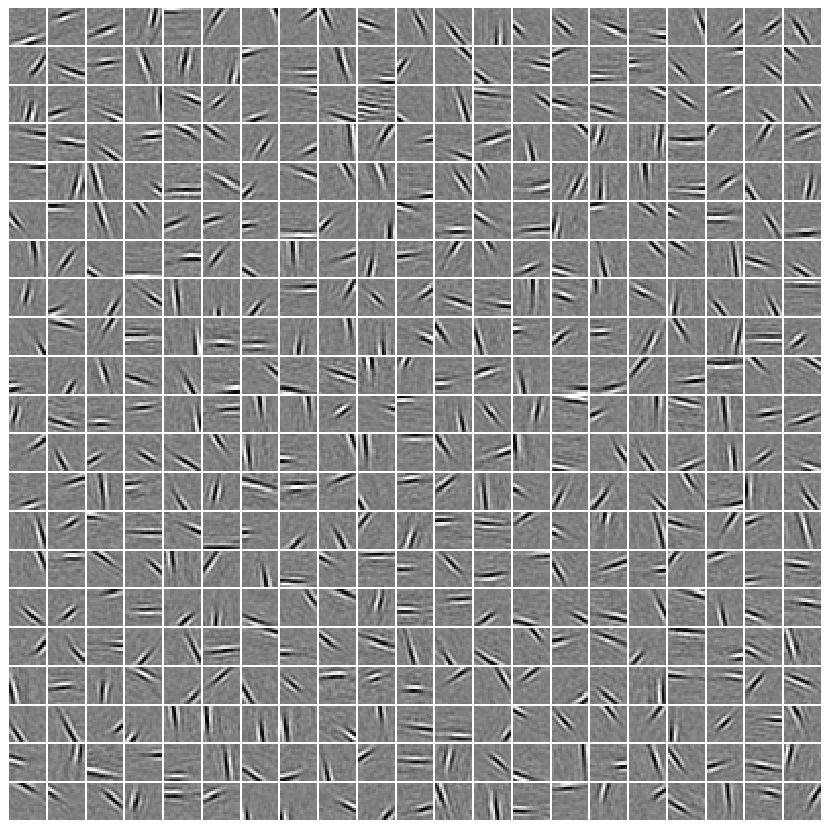

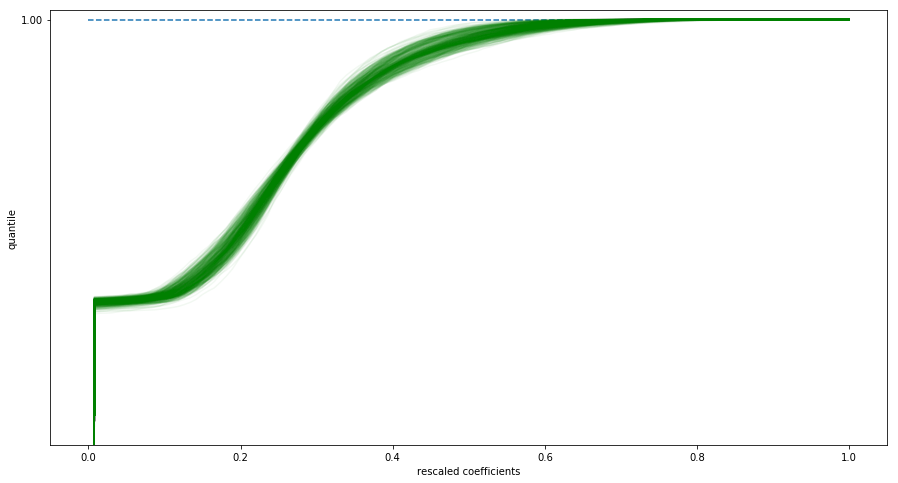

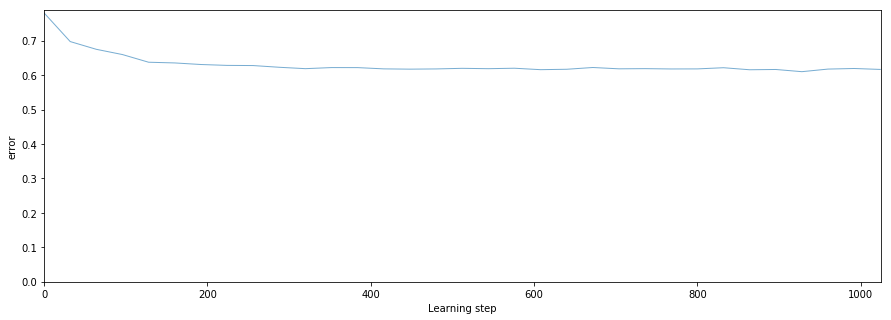

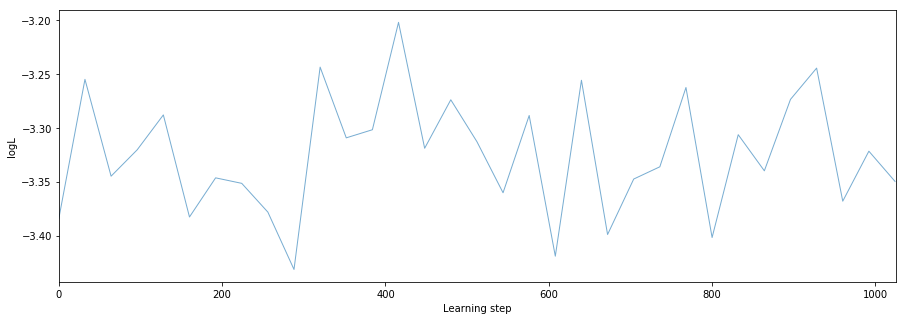

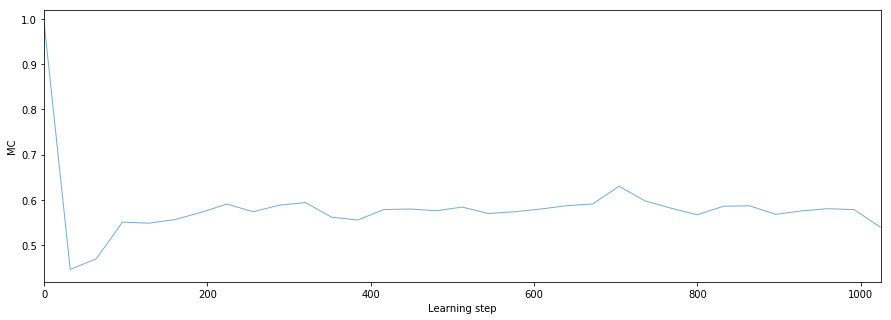

In [7]:
list_figures = ['show_dico', 'time_plot_error', 'time_plot_logL', 'time_plot_MC', 'show_Pcum']

dico = {}
for homeo_method in homeo_methods:
    print(42*'🐶')
    print(19*'🐶' + homeo_method + 19*'🐶')
    print(42*'🐶')
    shl = SHL(homeo_method=homeo_method)
    dico[homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method)

    print('size of dictionary = (number of filters, size of imagelets) = ', dico[homeo_method].dictionary.shape)
    print('average of filters = ',  dico[homeo_method].dictionary.mean(axis=1).mean(), 
          '+/-',  dico[homeo_method].dictionary.mean(axis=1).std())
    SE = np.sqrt(np.sum(dico[homeo_method].dictionary**2, axis=1))
    print('average energy of filters = ', SE.mean(), '+/-', SE.std())
    plt.show()

## coding

The learning itself is done via a gradient descent but is highly dependent on the coding / decoding algorithm. This belongs to a another function (in the [shl_encode.py](https://github.com/bicv/SparseHebbianLearning/blob/master/shl_scripts/shl_encode.py) script)

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶Non🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (1024, 441)
average of codewords =  0.031329491425454756
average std of codewords =  0.20690312040540215
l0-sparseness of codewords =  0.02942531179138322
std of the average of individual patches =  0.006988357792909823


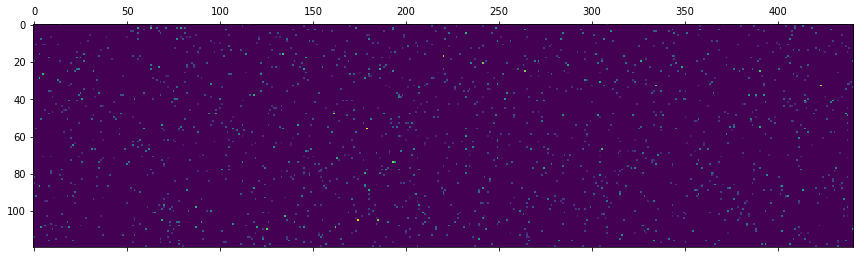

<Figure size 1080x216 with 0 Axes>

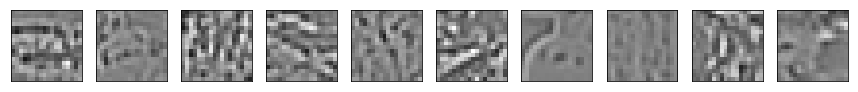

number of codes, size of reconstructed images =  (1024, 324)


<Figure size 1080x216 with 0 Axes>

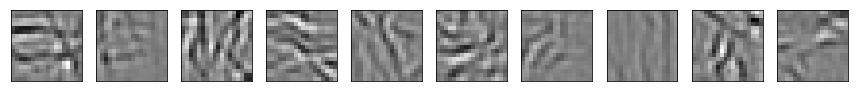

<Figure size 1080x216 with 0 Axes>

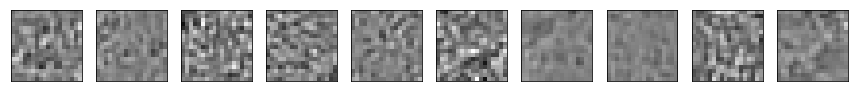

average of data patches =  -1.5745974446505243e-05 +/- 0.009437659666872123
average of residual patches =  0.0006770741847039706 +/- 0.007811872104527508
median energy of data =  0.2957429896066651
average energy of data =  0.2965184292743568 +/- 0.09096577087618517
average error =  0.0006770741847039706 +/- 0.1915139992063375
average energy of residual =  0.18126876223917535 +/- 0.06180377138762598
median energy of residual =  0.18401965958886585
average gain of coding =  1.6845588938979335 +/- 0.31699393286344
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (1024, 441)
average of codewords =  0.031329491425454756
average std of codewords =  0.20690312040540215
l0-sparseness of codewords =  0.02942531179138322
std of the average of individual patches =  0.006988357792909823


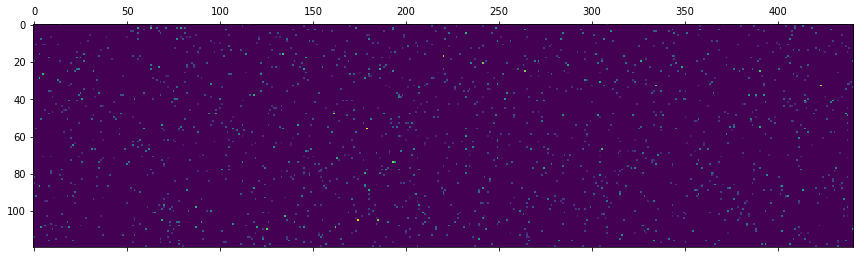

<Figure size 1080x216 with 0 Axes>

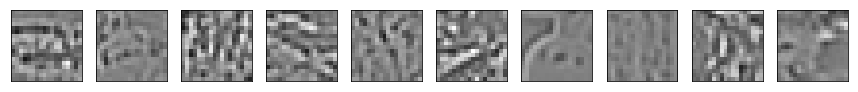

number of codes, size of reconstructed images =  (1024, 324)


<Figure size 1080x216 with 0 Axes>

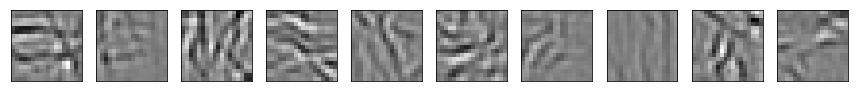

<Figure size 1080x216 with 0 Axes>

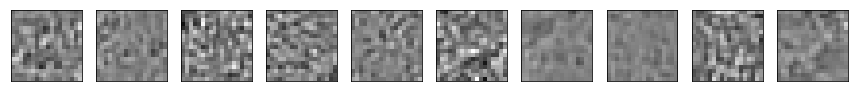

average of data patches =  -1.5745974446505243e-05 +/- 0.009437659666872123
average of residual patches =  0.0006770741847039705 +/- 0.007811872104527508
median energy of data =  0.2957429896066651
average energy of data =  0.2965184292743568 +/- 0.09096577087618517
average error =  0.0006770741847039705 +/- 0.1915139992063375
average energy of residual =  0.18126876223917535 +/- 0.06180377138762598
median energy of residual =  0.18401965958886585
average gain of coding =  1.6845588938979335 +/- 0.31699393286344
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (1024, 441)
average of codewords =  0.030878087305990554
average std of codewords =  0.20504538454913504
l0-sparseness of codewords =  0.02921937003968254
std of the average of individual patches =  0.0076057725519236025


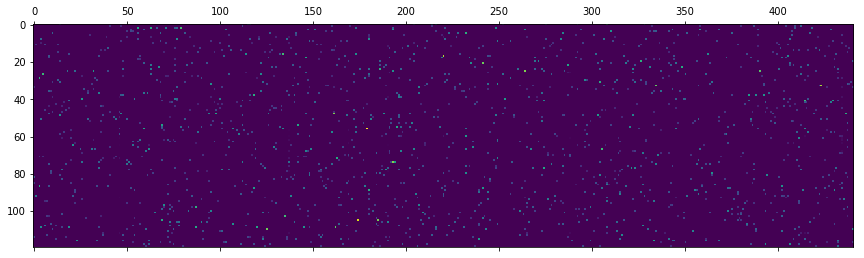

<Figure size 1080x216 with 0 Axes>

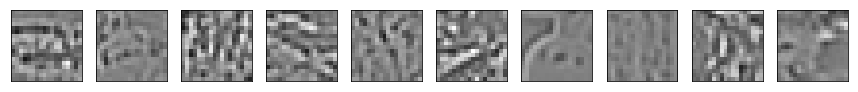

number of codes, size of reconstructed images =  (1024, 324)


<Figure size 1080x216 with 0 Axes>

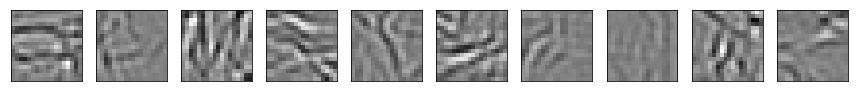

<Figure size 1080x216 with 0 Axes>

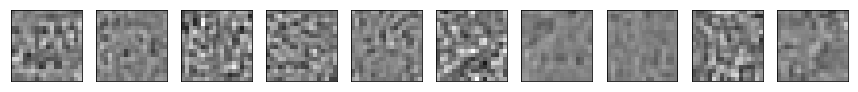

average of data patches =  -1.5745974446505243e-05 +/- 0.009437659666872123
average of residual patches =  0.000600707610197611 +/- 0.007850897555694097
median energy of data =  0.2957429896066651
average energy of data =  0.2965184292743568 +/- 0.09096577087618517
average error =  0.000600707610197611 +/- 0.19415374502244712
average energy of residual =  0.18397330179117738 +/- 0.06204725444309942
median energy of residual =  0.18556435098538587
average gain of coding =  1.651604759582132 +/- 0.28992070500141326
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (1024, 441)
average of codewords =  0.03129257136807742
average std of codewords =  0.206222504178424
l0-sparseness of codewords =  0.029420882936507936
std of the average of individual patches =  0.00683092103397652


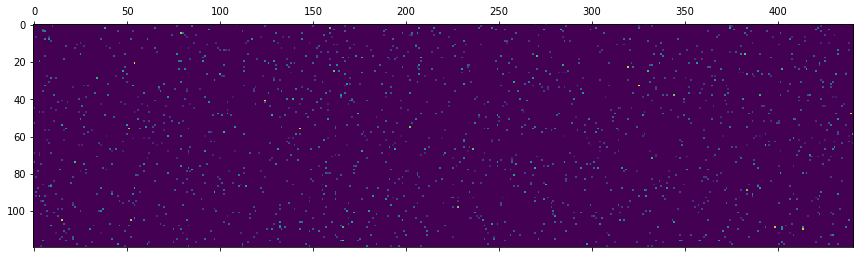

<Figure size 1080x216 with 0 Axes>

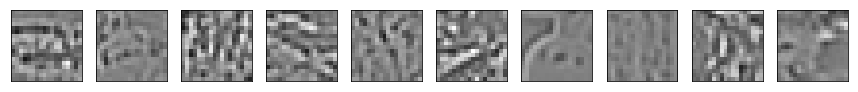

number of codes, size of reconstructed images =  (1024, 324)


<Figure size 1080x216 with 0 Axes>

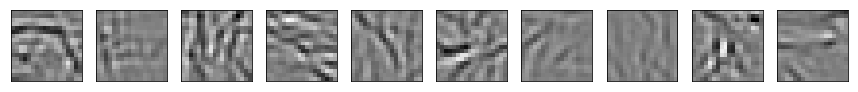

<Figure size 1080x216 with 0 Axes>

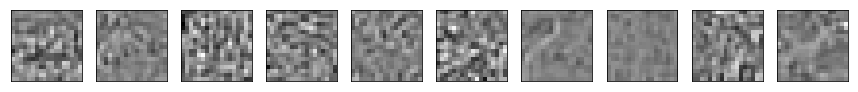

average of data patches =  -1.5745974446505243e-05 +/- 0.009437659666872123
average of residual patches =  8.87917914325967e-05 +/- 0.0077550117191832295
median energy of data =  0.2957429896066651
average energy of data =  0.2965184292743568 +/- 0.09096577087618517
average error =  8.87917914325967e-05 +/- 0.19266483821353556
average energy of residual =  0.18236052902813688 +/- 0.062164179560323184
median energy of residual =  0.18772838780444107
average gain of coding =  1.6738509018600827 +/- 0.30761927737551603
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (1024, 441)
average of codewords =  0.03129257136807742
average std of codewords =  0.206222504178424
l0-sparseness of codewords =  0.029420882936507936
std of the average of individual patches =  0.006830921033976519


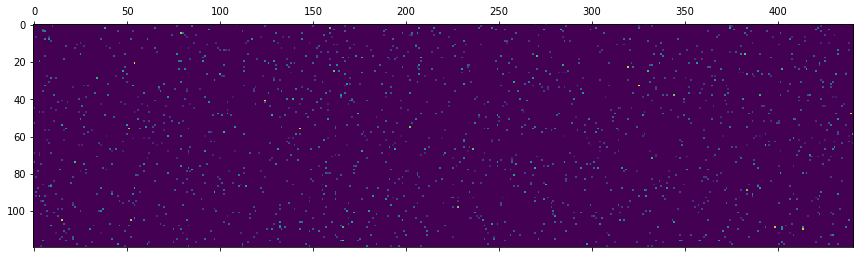

<Figure size 1080x216 with 0 Axes>

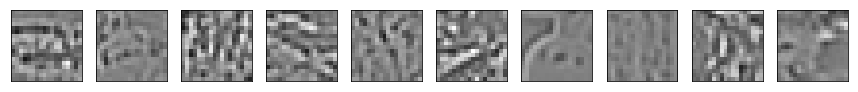

number of codes, size of reconstructed images =  (1024, 324)


<Figure size 1080x216 with 0 Axes>

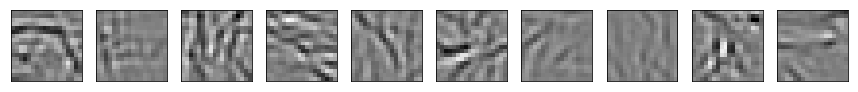

<Figure size 1080x216 with 0 Axes>

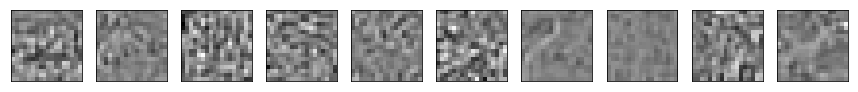

average of data patches =  -1.5745974446505243e-05 +/- 0.009437659666872123
average of residual patches =  8.879179143259677e-05 +/- 0.0077550117191832295
median energy of data =  0.2957429896066651
average energy of data =  0.2965184292743568 +/- 0.09096577087618517
average error =  8.879179143259677e-05 +/- 0.19266483821353556
average energy of residual =  0.18236052902813688 +/- 0.062164179560323184
median energy of residual =  0.18772838780444107
average gain of coding =  1.6738509018600827 +/- 0.30761927737551603
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (1024, 441)
average of codewords =  0.030952116149532354
average std of codewords =  0.2045608406996302
l0-sparseness of codewords =  0.029292446145124718
std of the average of individual patches =  0.007958221064144752


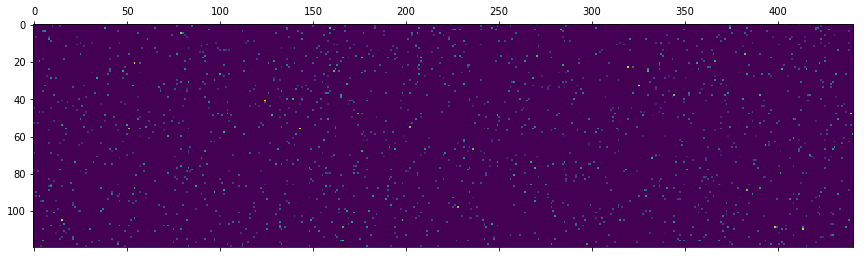

<Figure size 1080x216 with 0 Axes>

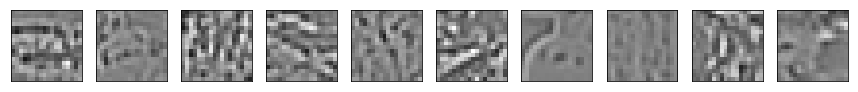

number of codes, size of reconstructed images =  (1024, 324)


<Figure size 1080x216 with 0 Axes>

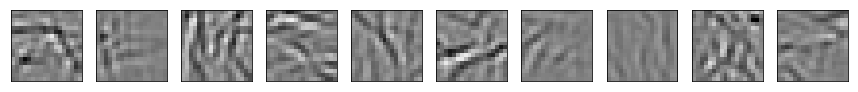

<Figure size 1080x216 with 0 Axes>

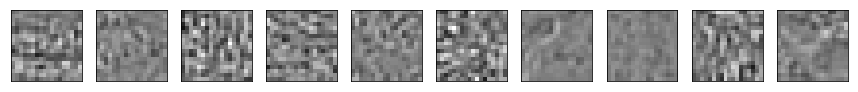

average of data patches =  -1.5745974446505243e-05 +/- 0.009437659666872123
average of residual patches =  8.135978548498587e-05 +/- 0.007916132436858748
median energy of data =  0.2957429896066651
average energy of data =  0.2965184292743568 +/- 0.09096577087618517
average error =  8.135978548498587e-05 +/- 0.1951034335383007
average energy of residual =  0.18467579903398926 +/- 0.06293016485761352
median energy of residual =  0.18759985769205945
average gain of coding =  1.6482776011785538 +/- 0.28565832658549756
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HEH🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (1024, 441)
average of codewords =  0.031231214573573148
average std of codewords =  0.20612913451220943
l0-sparseness of codewords =  0.029389880952380952
std of the average of individual patches =  0.006512713605893415


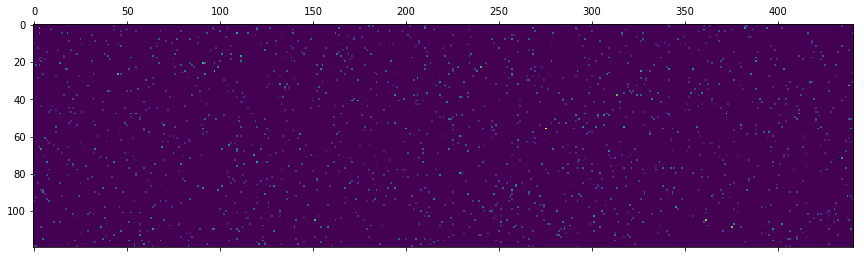

<Figure size 1080x216 with 0 Axes>

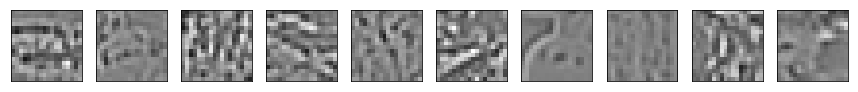

number of codes, size of reconstructed images =  (1024, 324)


<Figure size 1080x216 with 0 Axes>

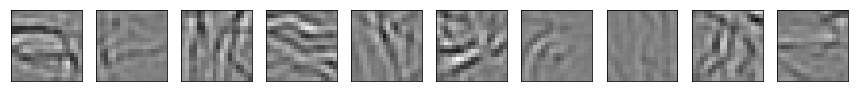

<Figure size 1080x216 with 0 Axes>

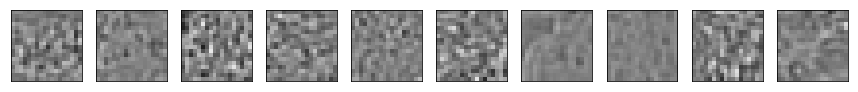

average of data patches =  -1.5745974446505243e-05 +/- 0.009437659666872123
average of residual patches =  -0.00020060843994145082 +/- 0.007723094413480168
median energy of data =  0.2957429896066651
average energy of data =  0.2965184292743568 +/- 0.09096577087618517
average error =  -0.00020060843994145082 +/- 0.19305117401371708
average energy of residual =  0.18266824318689023 +/- 0.062458858161479086
median energy of residual =  0.18635193213782714
average gain of coding =  1.6706290777492299 +/- 0.30137107380884637
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (1024, 441)
average of codewords =  0.031231214573573148
average std of codewords =  0.20612913451220943
l0-sparseness of codewords =  0.029389880952380952
std of the average of individual patches =  0.006512713605893415


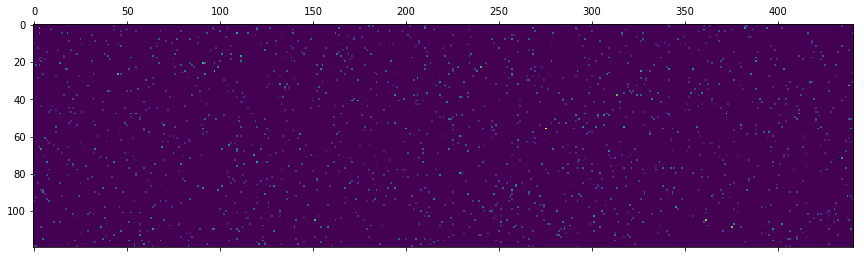

<Figure size 1080x216 with 0 Axes>

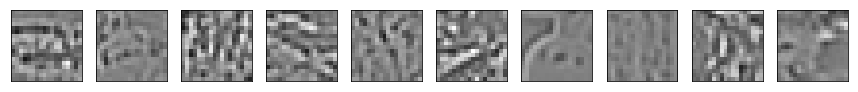

number of codes, size of reconstructed images =  (1024, 324)


<Figure size 1080x216 with 0 Axes>

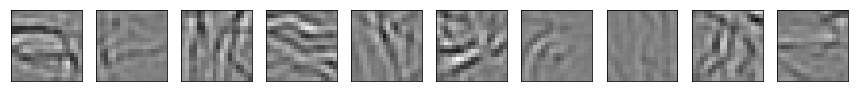

<Figure size 1080x216 with 0 Axes>

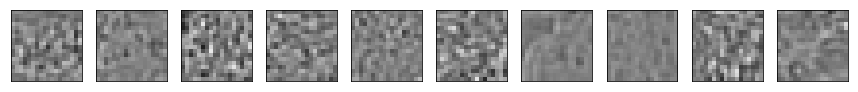

average of data patches =  -1.5745974446505243e-05 +/- 0.009437659666872123
average of residual patches =  -0.00020060843994145053 +/- 0.007723094413480167
median energy of data =  0.2957429896066651
average energy of data =  0.2965184292743568 +/- 0.09096577087618517
average error =  -0.00020060843994145053 +/- 0.19305117401371708
average energy of residual =  0.18266824318689023 +/- 0.062458858161479086
median energy of residual =  0.18635193213782716
average gain of coding =  1.67062907774923 +/- 0.30137107380884637
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (1024, 441)
average of codewords =  0.031193903869789243
average std of codewords =  0.20566662393777002
l0-sparseness of codewords =  0.02939873866213152
std of the average of individual patches =  0.006916950814764356


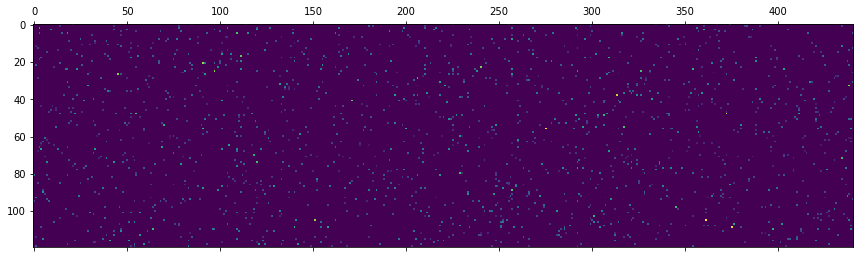

<Figure size 1080x216 with 0 Axes>

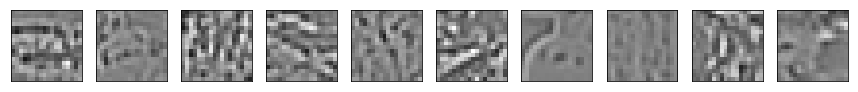

number of codes, size of reconstructed images =  (1024, 324)


<Figure size 1080x216 with 0 Axes>

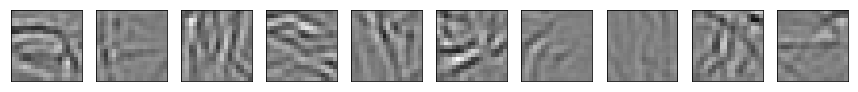

<Figure size 1080x216 with 0 Axes>

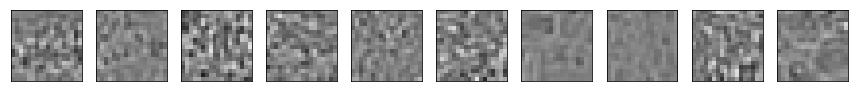

average of data patches =  -1.5745974446505243e-05 +/- 0.009437659666872123
average of residual patches =  -0.00011946514435054501 +/- 0.0078986167140185
median energy of data =  0.2957429896066651
average energy of data =  0.2965184292743568 +/- 0.09096577087618517
average error =  -0.00011946514435054501 +/- 0.19359966560646838
average energy of residual =  0.18309972867503876 +/- 0.06289144738344225
median energy of residual =  0.18654395389598438
average gain of coding =  1.667627737627952 +/- 0.3026369662454534


In [8]:
np.random.seed(1973)
#sparse_code = shl.code(data, dico_, matname=matname)
P_cum_zeroeffect = np.linspace(0, 1, shl.nb_quant, endpoint=True)[np.newaxis, :] * np.ones((shl.n_dictionary, 1))
#P_cum = dico_.P_cum
#P_cum = None
#l0_sparseness = 150
l0_sparseness = shl.l0_sparseness


from shl_scripts.shl_tools import show_data, print_stats
coding_gain = {}
for homeo_method in homeo_methods:
    coding_gain[homeo_method] = {}
    print(33*'🐶')
    print(15*'🐶' + homeo_method[:3] + 15*'🐶')
    print(33*'🐶')

    from shl_scripts.shl_encode import mp
    labels = ['Non', 'One', 'Hom']
    for P_cum, gain, label in zip([None, P_cum_zeroeffect, dico[homeo_method].P_cum], [np.ones(shl.n_dictionary), None, None], labels):
        sparse_code = mp(data[indx, :], dico[homeo_method].dictionary, precision=dico[homeo_method].precision, l0_sparseness=l0_sparseness, P_cum=P_cum, gain=gain)
        SD, SE = print_stats(data[indx, :], dico[homeo_method].dictionary, sparse_code)
        coding_gain[homeo_method][label] = (SD/SE).mean()


In [9]:
coding_gain

{'None': {'Non': 1.6845588938979335,
  'One': 1.6845588938979335,
  'Hom': 1.651604759582132},
 'HAP': {'Non': 1.6738509018600827,
  'One': 1.6738509018600827,
  'Hom': 1.6482776011785538},
 'HEH': {'Non': 1.6706290777492299,
  'One': 1.67062907774923,
  'Hom': 1.667627737627952}}

## Version used

In [10]:
%load_ext watermark
%watermark -i -h -m -v -p numpy,matplotlib,shl_scripts

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]
IPython 6.5.0
OS Darwin 17.7.0 x86_64 i386 64bit
shl_scripts 20171221
numpy 1.15.1
shl_scripts 20171221
pandas 0.23.4
matplotlib 3.0.0
Wed Sep 26 16:25:22 2018 CEST